[K-means clustering]

1. Apply K-means clustering to MNIST training dataset with different K = 5, 10, 15, 20 and present the following results for each K.
2. Visualize K centroid images for each category.
3. Plot the training energy per optimization iteration.
4. Plot the training accuracy per optimization iteration.
5. Plot the testing accuracy per optimization iteration.

[energy]

$\sum_{k = 1}^K \| x_i - c_{k_i} \|^2$
where $k_i$ denotes the category of $x_i$, and $c_{k_i}$ denotes the centroid of category $x_i$.

[accuracy]

$\frac{\sum_{k = 1}^K m_k}{N}$
where $N$ denotes the total number of data, and $m_k$ denotes the number of data with majority for category $k$.

- (training energy) is computed on the training dataset.
- (training accuracy) is computed on the training dataset.
- (testing accuracy) is computed on the testing dataset.


$ k $-means algorithm

- alternate between updating the partition, then the representatives
- a famous algorithm called $k$-$means$
- objective $J^{clust}$ decreases in each step

given $x_{1},...,x_{N} \in R^{n}$ and $z_{1},...z_{k} \in R^{n}$

repeat  
Update partition: assign $i$ to $G_j,j=argmin_{j'}\|x_i-z_{j'}\|^2$  
Update centroids: $z_j=\frac{1}{\mid P_j\mid}\sum_{i \in p_j'}{x_i}$
    
until $z_1,...,z_k$ stop changing

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count       	= 0     # count for the number of images

In [3]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

In [4]:
#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

In [30]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1
    # print("Processed image: %d" % count)

In [6]:
#
# K-Means clustering
#

# For K=5
K=5
# Generate K centroids randomly.
centroid = np.random.rand(size_row * size_col, K)
cluster = np.empty(num_image, dtype=int)

# centroid_previous = np.zeros((size_row * size_col, K))
sum_cluster = np.zeros((size_row * size_col, K))
count_cluster = np.zeros(K)
centroid_previous = np.zeros((size_row * size_col, K))

# Clusterization
iteration = 0
total_cost = []
accuracy = []
# while not (np.array_equal(centroid_previous, centroid)):
for iteration in range(10):
    print("Iteration : %d" % iteration)
    cost = 0
    list_cost = []
    centroid_previous = centroid.copy()
    for i in range(num_image):
        list_distance = np.zeros(K)
        for j in range(K):
            list_distance[j] = distance(list_image[:,i], centroid[:,j])
        cluster[i] = list_distance.argmin()
        cost += list_distance.min()
    list_cost.append(cost)
    total_cost.append(np.sum(list_cost))
    #accuracy.append(/num_image)
    
    # Accuracy
    cluster_label = np.zeros((K, 10))
    for i in range(num_image):
        for j in range(K):
            if cluster[i] == j:
                cluster_label[j, list_label[i]] += 1
    sum_accuracy = 0
    for i in range(K):
        sum_accuracy += np.max(cluster_label[i,:])
    accuracy.append(sum_accuracy / num_image)
    
    # Update centroids               
    for i in range(num_image):
        for j in range(K):
            if cluster[i] == j:
                sum_cluster[:,j] += list_image[:, i]
                count_cluster[j] +=1
    # Updated centroids
    centroid = sum_cluster / count_cluster
    sum_cluster.fill(0)
    count_cluster.fill(0)

Iteration : 0
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 9


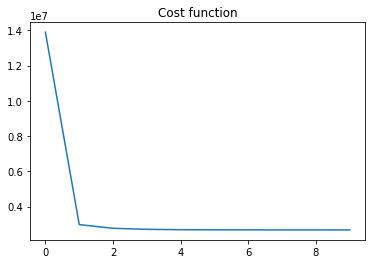

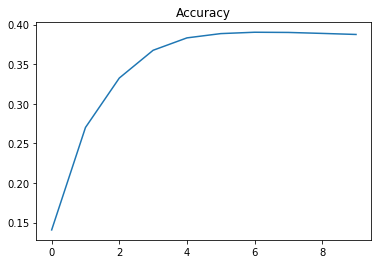

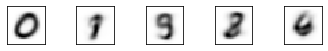

In [7]:
# Visualize the cost function
plt.title("Cost function")
plt.plot(total_cost)
plt.show()

# Visualize the accuracy
plt.title("Accuracy")
plt.plot(accuracy)
plt.show()

# Visualize the centroid image

for i in range(K):

    label       = list(range(K))
    im_vector   = centroid[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(K, K, i+1)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [15]:
#
# K-Means clustering
#

# For K=10
K=10
# Generate K centroids randomly.
centroid = np.random.rand(size_row * size_col, K)
cluster = np.empty(num_image, dtype=int)

# centroid_previous = np.zeros((size_row * size_col, K))
sum_cluster = np.zeros((size_row * size_col, K))
count_cluster = np.zeros(K)
centroid_previous = np.zeros((size_row * size_col, K))

# Clusterization
iteration = 0
total_cost = []
accuracy = []
# while not (np.array_equal(centroid_previous, centroid)):
for iteration in range(10):
    print("Iteration : %d" % iteration)
    cost = 0
    list_cost = []
    centroid_previous = centroid.copy()
    for i in range(num_image):
        list_distance = np.zeros(K)
        for j in range(K):
            list_distance[j] = distance(list_image[:,i], centroid[:,j])
        cluster[i] = list_distance.argmin()
        cost += list_distance.min()
    list_cost.append(cost)
    total_cost.append(np.sum(list_cost))
    #accuracy.append(/num_image)

    # Accuracy
    cluster_label = np.zeros((K, 10))
    for i in range(num_image):
        for j in range(K):
            if cluster[i] == j:
                cluster_label[j, list_label[i]] += 1
    sum_accuracy = 0
    for i in range(K):
        sum_accuracy += np.max(cluster_label[i,:])
    accuracy.append(sum_accuracy / num_image)
    
    # Update centroids               
    for i in range(num_image):
        for j in range(K):
            if cluster[i] == j:
                sum_cluster[:,j] += list_image[:, i]
                count_cluster[j] +=1
    # Updated centroids
    centroid = sum_cluster / count_cluster
    sum_cluster.fill(0)
    count_cluster.fill(0)

Iteration : 0
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 9


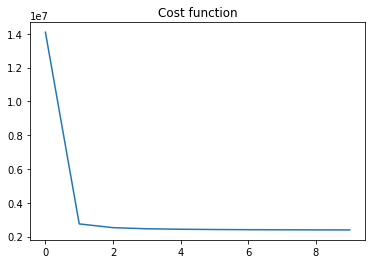

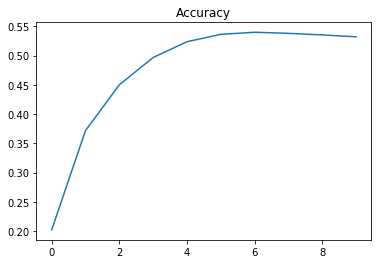

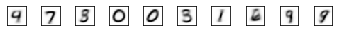

In [17]:
# Visualize the cost function
plt.title("Cost function")
plt.plot(total_cost)
plt.show()

# Visualize the accuracy
plt.title("Accuracy")
plt.plot(accuracy)
plt.show()

# Visualize the centroid image

for i in range(K):

    label       = list(range(K))
    im_vector   = centroid[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(K, K, i+1)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [20]:
#
# K-Means clustering
#

# For K=15
K=15
# Generate K centroids randomly.
centroid = np.random.rand(size_row * size_col, K)
cluster = np.empty(num_image, dtype=int)

# centroid_previous = np.zeros((size_row * size_col, K))
sum_cluster = np.zeros((size_row * size_col, K))
count_cluster = np.zeros(K)
centroid_previous = np.zeros((size_row * size_col, K))

# Clusterization
iteration = 0
total_cost = []
accuracy = []
# while not (np.array_equal(centroid_previous, centroid)):
for iteration in range(10):
    print("Iteration : %d" % iteration)
    cost = 0
    list_cost = []
    centroid_previous = centroid.copy()
    for i in range(num_image):
        list_distance = np.zeros(K)
        for j in range(K):
            list_distance[j] = distance(list_image[:,i], centroid[:,j])
        cluster[i] = list_distance.argmin()
        cost += list_distance.min()
    list_cost.append(cost)
    total_cost.append(np.sum(list_cost))
    #accuracy.append(/num_image)
    
    # Accuracy
    cluster_label = np.zeros((K, 10))
    for i in range(num_image):
        for j in range(K):
            if cluster[i] == j:
                cluster_label[j, list_label[i]] += 1
    sum_accuracy = 0
    for i in range(K):
        sum_accuracy += np.max(cluster_label[i,:])
    accuracy.append(sum_accuracy / num_image)
    
    # Update centroids               
    for i in range(num_image):
        for j in range(K):
            if cluster[i] == j:
                sum_cluster[:,j] += list_image[:, i]
                count_cluster[j] +=1
    # Updated centroids
    centroid = sum_cluster / count_cluster
    sum_cluster.fill(0)
    count_cluster.fill(0)

Iteration : 0
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 9


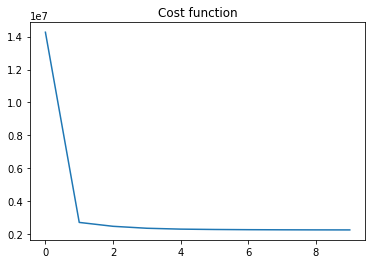

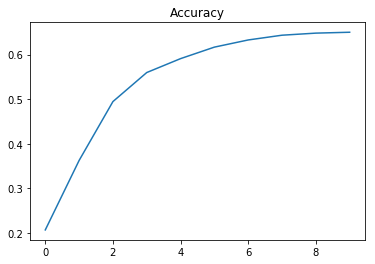

In [21]:
# Visualize the cost function
plt.title("Cost function")
plt.plot(total_cost)
plt.show()

# Visualize the accuracy
plt.title("Accuracy")
plt.plot(accuracy)
plt.show()

# Visualize the centroid image

for i in range(K):

    label       = list(range(K))
    im_vector   = centroid[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(K, K, i+1)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [25]:
#
# K-Means clustering
#

# For K=20
K=20
# Generate K centroids randomly.
centroid = np.random.rand(size_row * size_col, K)
cluster = np.empty(num_image, dtype=int)

# centroid_previous = np.zeros((size_row * size_col, K))
sum_cluster = np.zeros((size_row * size_col, K))
count_cluster = np.zeros(K)
centroid_previous = np.zeros((size_row * size_col, K))

# Clusterization
iteration = 0
total_cost = []
accuracy = []
# while not (np.array_equal(centroid_previous, centroid)):
for iteration in range(10):
    print("Iteration : %d" % iteration)
    cost = 0
    list_cost = []
    centroid_previous = centroid.copy()
    for i in range(num_image):
        list_distance = np.zeros(K)
        for j in range(K):
            list_distance[j] = distance(list_image[:,i], centroid[:,j])
        cluster[i] = list_distance.argmin()
        cost += list_distance.min()
    list_cost.append(cost)
    total_cost.append(np.sum(list_cost))
    #accuracy.append(/num_image)
    
    # Accuracy
    cluster_label = np.zeros((K, 10))
    for i in range(num_image):
        for j in range(K):
            if cluster[i] == j:
                cluster_label[j, list_label[i]] += 1
    sum_accuracy = 0
    for i in range(K):
        sum_accuracy += np.max(cluster_label[i,:])
    accuracy.append(sum_accuracy / num_image)
    
    # Update centroids               
    for i in range(num_image):
        for j in range(K):
            if cluster[i] == j:
                sum_cluster[:,j] += list_image[:, i]
                count_cluster[j] +=1
    # Updated centroids
    centroid = sum_cluster / count_cluster
    sum_cluster.fill(0)
    count_cluster.fill(0)

Iteration : 0


/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in true_divide
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide


Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 9


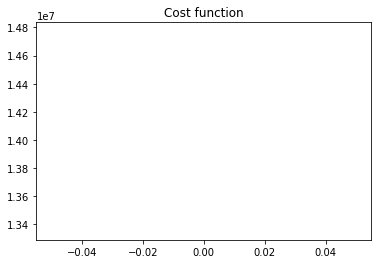

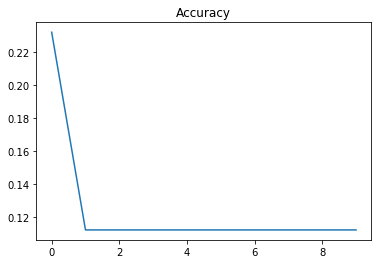

In [27]:
# Visualize the cost function
plt.title("Cost function")
plt.plot(total_cost)
plt.show()

# Visualize the accuracy
plt.title("Accuracy")
plt.plot(accuracy)
plt.show()

# Visualize the centroid image

for i in range(K):

    label       = list(range(K))
    im_vector   = centroid[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(K, K, i+1)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()